In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
original_waypoints = np.loadtxt('race3_rl_3.csv', delimiter=',')
lobby_map = cv2.imread('../map/race3_2.pgm', cv2.IMREAD_GRAYSCALE)


In [16]:
print(original_waypoints[0])

[-0.222544 -0.133693  3.706515 -0.189474  2.395881  0.      ]


In [7]:
resolution = 0.05
origin = [-10.3, -1.55]

In [17]:
# ]
segment_points = [
    [-0.48, -0.07, 1.0, 2.0, 0.3, 0.01], # S1
    [3.56, -0.25, 1.0, 1.2, 0.4, 0.01], # T1cd 
    [7.1, 2.57, 1.0, 2.0, 0.3, 0.01], # S2 
    [7.12, 7.49, 1.0, 1.0, 0.3, 0.01], # T2-2
    [5.63, 9.21, 1.0, 1.5, 0.2, 0.01], # T2-2
    [4.27, 7.86, 1.0, 2.0, 0.3, 0.01], # S3 
    [-0.5, 3.63, 1.0,1.5, 0.3, 0.02], #T3-1
    [-1.69, 1.46, 1.0,1.5, 0.2, 0.00] #T3-2
]
segment_points = np.array(segment_points)

(-7.130000448226928, 10.030001020431518, -2.25, 14.25)

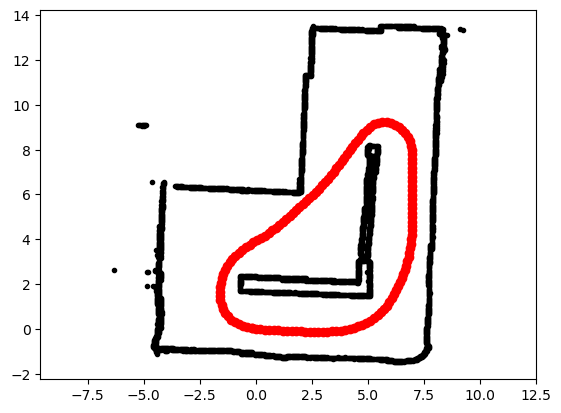

In [18]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
# plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [21]:
np.any(lobby_map == 254, axis=1).shape

(301,)

(-2.13076, 7.5659600000000005, -0.8070000000000002, 9.687000000000001)

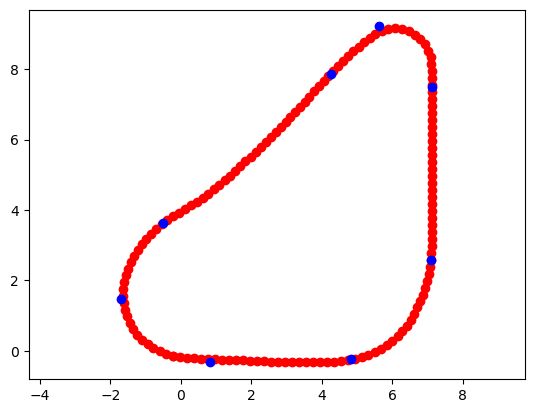

In [25]:
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [10]:
seg_start_idx = []
for i in range(segment_points.shape[0]):
    point = segment_points[i, :2]
    dist = np.linalg.norm(original_waypoints[:,:2] - point, axis=1)
    idx = np.argmin(dist)
    seg_start_idx.append(idx)
print(seg_start_idx)

[5, 25, 41, 66, 78, 88, 120, 133]


In [15]:
seg_waypoints = np.zeros((original_waypoints.shape[0], 9))
seg_waypoints[:, :3] = original_waypoints[:, [0, 1, 2]]
seg_waypoints[:, -1] = original_waypoints[:, -1]
seg_start_idx.append(seg_start_idx[0])
for i in range(len(seg_start_idx)-1):
    if seg_start_idx[i] > seg_start_idx[i+1]:
        for j in range(seg_start_idx[i], original_waypoints.shape[0]):
            seg_waypoints[j, 3:7] = segment_points[i, 2:]
            seg_waypoints[j, 7] = i
        for j in range(seg_start_idx[i+1]):
            seg_waypoints[j, 3:7] = segment_points[0, 2:]
            seg_waypoints[j, 7] = i
    else:
        for j in range(seg_start_idx[i], seg_start_idx[i+1]):
            seg_waypoints[j, 3:7] = segment_points[i, 2:]
            seg_waypoints[j, 7] = i

In [33]:
np.savetxt('race1_0.7_seg.csv', seg_waypoints, delimiter=',', fmt='%.3f')

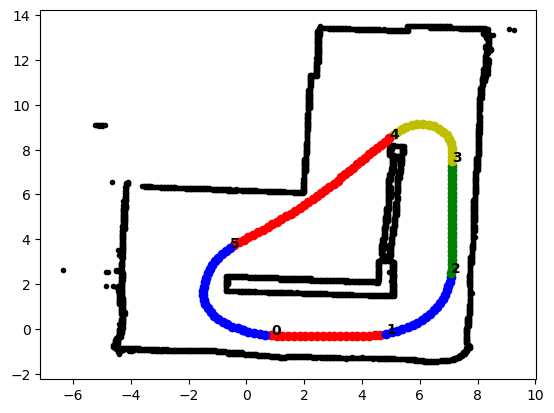

In [23]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
for i in range(len(seg_start_idx)-1):
    plt.plot(seg_waypoints[np.where(seg_waypoints[:,6] == i),0], seg_waypoints[np.where(seg_waypoints[:,6] == i),1], colors[i%4])
    plt.text(seg_waypoints[seg_start_idx[i], 0], seg_waypoints[seg_start_idx[i], 1], str(i), fontweight='bold')

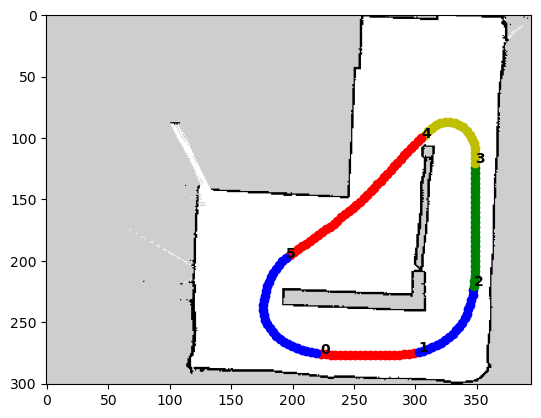

In [24]:
colors = ['ro', 'bo', 'go', 'yo']
plt.imshow(lobby_map, cmap='gray')
# plt.scatter((0-origin[0])/resolution, lobby_map.shape[0] - (0-origin[1])/resolution, c='r')
# plt.plot((seg_waypoints[:,0] - origin[0])/ resolution , lobby_map.shape[0]-(seg_waypoints[:,1] - origin[1]) / resolution , 'ro')
for i in range(len(seg_start_idx)-1):
    plt.plot((seg_waypoints[np.where(seg_waypoints[:,6] == i),0] - origin[0])/resolution, lobby_map.shape[0] - (seg_waypoints[np.where(seg_waypoints[:,6] == i),1] - origin[1]) /resolution, colors[i%4])
    plt.text((seg_waypoints[seg_start_idx[i], 0] - origin[0]) / resolution, lobby_map.shape[0] - (seg_waypoints[seg_start_idx[i], 1] - origin[1]) / resolution, str(i), fontweight='bold')

(-7.130000448226928, 10.030001020431518, -2.25, 14.25)

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


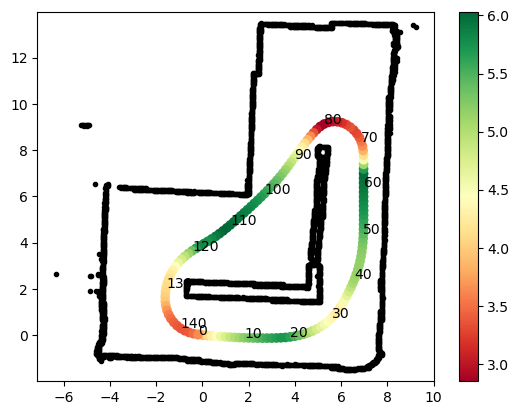

In [12]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')


velocities = seg_waypoints[:,2]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=velocities, cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), font='bold')
plt.colorbar()
plt.axis('equal')

(-7.130000448226928, 10.030001020431518, -2.25, 14.25)

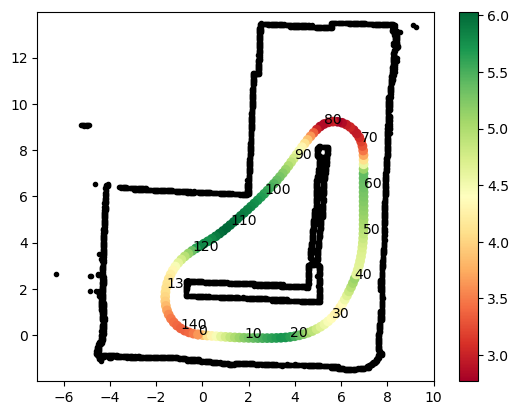

In [16]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')


velocities = seg_waypoints[:,2] * seg_waypoints[:, 3]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=velocities, cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), font='bold')
plt.colorbar()
plt.axis('equal')

(-9.62999939918518, 6.650000810623169, -1.5650000631809236, 8.665000802278518)

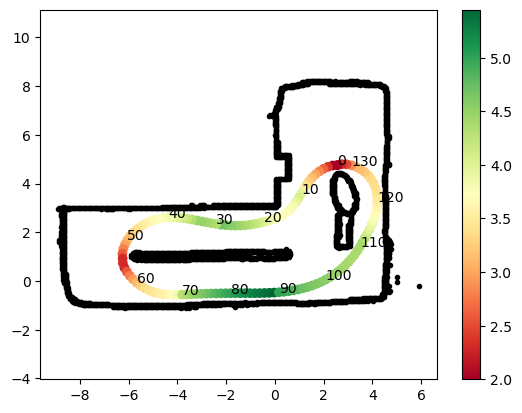

In [61]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')

seg_waypoints = np.loadtxt('race1_gtl2_imp.csv', delimiter=',')
velocities = seg_waypoints[:,2]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=velocities, cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), font='bold')
plt.colorbar()
plt.axis('equal')

(-9.62999939918518, 6.650000810623169, -1.5650000631809236, 8.665000802278518)

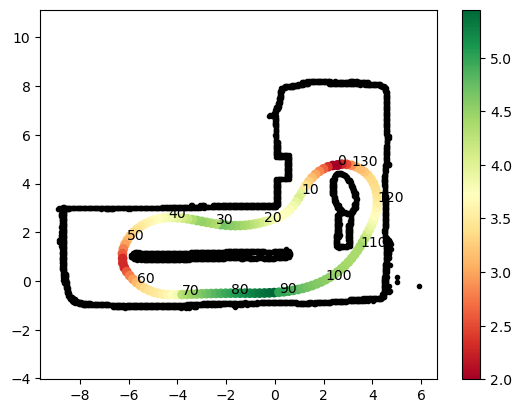

In [48]:
# Fill

faster_seg = np.loadtxt('race1_gentle_2.2_seg.csv', delimiter=',')
slower_seg = np.loadtxt('race1_gentle_2.0_seg.csv', delimiter=',')

start = 10
end = 30
slower_seg[start:end, 2] = faster_seg[start:end, 2]
# for i in [-1, -2]:
#     slower_seg[start + i] = (slower_seg[start+i+1] + slower_seg[start + i]) / 2
#     slower_seg[end - i] = (slower_seg[end-i-1] + slower_seg[end - i]) / 2


start = 70
end = 90
slower_seg[start:end, 2] = faster_seg[start:end, 2]
# for i in [-1, -2]:
#     slower_seg[start + i] = (slower_seg[start]*2 + slower_seg[start + i]) / 3
#     slower_seg[end - i] = (slower_seg[end]*2 + slower_seg[end - i]) / 3



blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')

seg_waypoints = slower_seg
velocities = seg_waypoints[:,2]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=velocities, cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), font='bold')
plt.colorbar()
plt.axis('equal')

In [49]:
np.savetxt('race1_gtl2_imp.csv', slower_seg, delimiter=',', fmt='%.3f')